# Matplotlib Scatter Plots

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Scatter Plot Notes

- scatter() - create a scatter plot of x vs y.
- Common parameters:
    - x, y - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
    - s - The size of each point. Can be a single size or an array for varying sizes.
    - c - Color of each marker. Can specify a single color or an array to have different colors for each point.
    - marker - The style of the marker. You can use markers like o, ^, *, etc.
    - alpha - The blending value of the markers, between 0 (transparent) and 1 (opaque).
- Syntax: plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')
- Scatter plots compare different categories or groups of data.

2. Subset the dataset to only Data Analysts

In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst']

df_DA

3. Explode the job skills column

In [ ]:
df_exploded = df_DA.explode('job_skills')

df_exploded

4. Group by the data to calculate total counts and median salary

- how to have different aggregations within agg function:

name of the new column = ('column to be aggregated','type of agg')

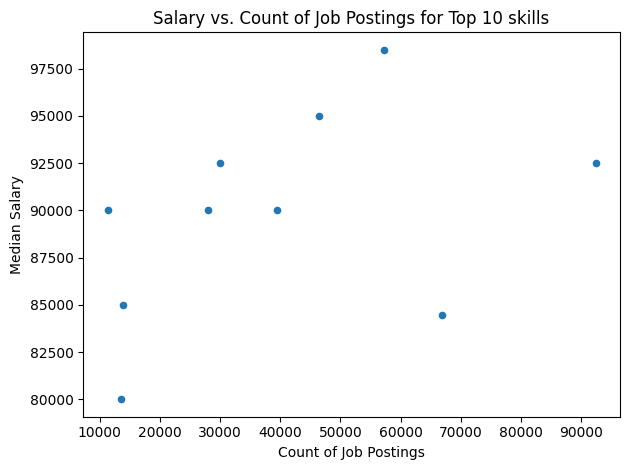

In [14]:
skill_stats = df_exploded.groupby('job_skills').agg(
        skill_count = ('job_skills','count'), 
        median_salary = ('salary_year_avg','median')     
)
skill_stats= skill_stats.sort_values(by='skill_count',ascending=False).head(10)
skill_stats.plot(kind = 'scatter', y= 'median_salary',x= 'skill_count')
plt.ylabel('Median Salary')
plt.xlabel('Count of Job Postings')
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
plt.tight_layout()



5. Create data labels for the scatter plot (the workaround way)

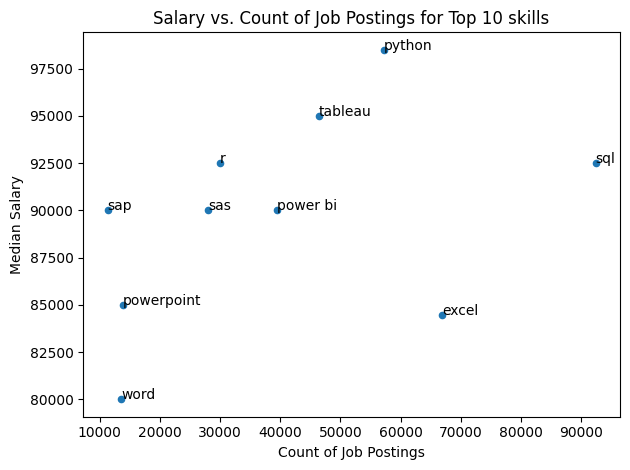

In [67]:
skill_stats = df_exploded.groupby('job_skills').agg(
        skill_count = ('job_skills','count'), 
        median_salary = ('salary_year_avg','median')     
                                                        )
skill_stats= skill_stats.sort_values(by='skill_count',ascending=False).head(10)
skill_stats.plot(kind = 'scatter', y= 'median_salary',x= 'skill_count')
plt.ylabel('Median Salary')
plt.xlabel('Count of Job Postings')
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
# added a for loop to find the coordinates of each skill on the plot
for i, txt in enumerate(skill_stats.index): # this is so hard to remember but so powerfull
    plt.text(x=skill_stats['skill_count'].iloc[i],y=skill_stats['median_salary'].iloc[i],s=txt)
plt.tight_layout()
